<h4>PRODIGY INFOTECH INTERNSHIP</h4>

<h5>TASK-4 Visualizing and analyzing the twitter sentiment data</h5>

In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
df=pd.read_csv('twitter_training.csv')

In [31]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [32]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [33]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [35]:
#no.of rows and columns in the dataset
print("shape of the dataset:",df.shape,"\n")
# Checking the data types of the columns
print("Data types of the columns:",df.dtypes,"\n")
#sum of the null values in each column
print("Sum of the null values in the dataset:\n",df.isnull().sum())

shape of the dataset: (74681, 4) 

Data types of the columns: 2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object 

Sum of the null values in the dataset:
 2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [36]:
df.value_counts()

2401   Borderlands                        Positive    im getting on borderlands and i will murder you all ,                                                                          
5810   HomeDepot                          Positive    Congratulations!!                                                                                                                  5
2895   Dota2                              Positive    Wow                                                                                                                                5
10181  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             5
3108   Dota2                              Negative    wtf                                                                                                                                5
1932   CallOfDutyBlackopsColdWar          Positive    Wow             

Duplicate Rows Count: 2700


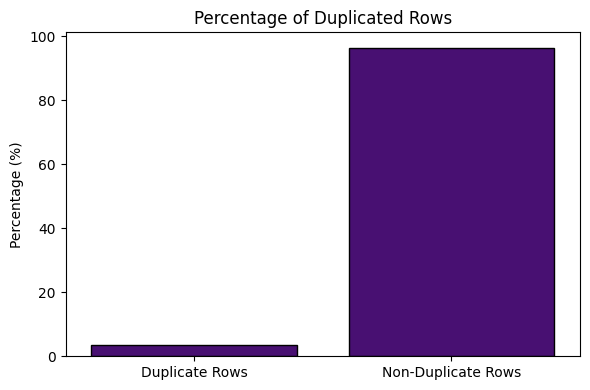

In [37]:
#analyzing duplicated rows
duplicate_count = df.duplicated().sum()
            # Print duplicate rows count
print("Duplicate Rows Count:", duplicate_count)
           # Calculate the percentage of duplicate rows
duplicate_percentage = (duplicate_count / len(df)) * 100

            # Create a bar chart to visualize the percentage of duplicate rows
plt.figure(figsize=(6, 4))
sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                        y=[duplicate_percentage, 100 - duplicate_percentage], color='indigo', edgecolor='black')
plt.ylabel("Percentage (%)")
plt.title("Percentage of Duplicated Rows")
plt.tight_layout()
plt.show()

Missing Values Counts:


2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


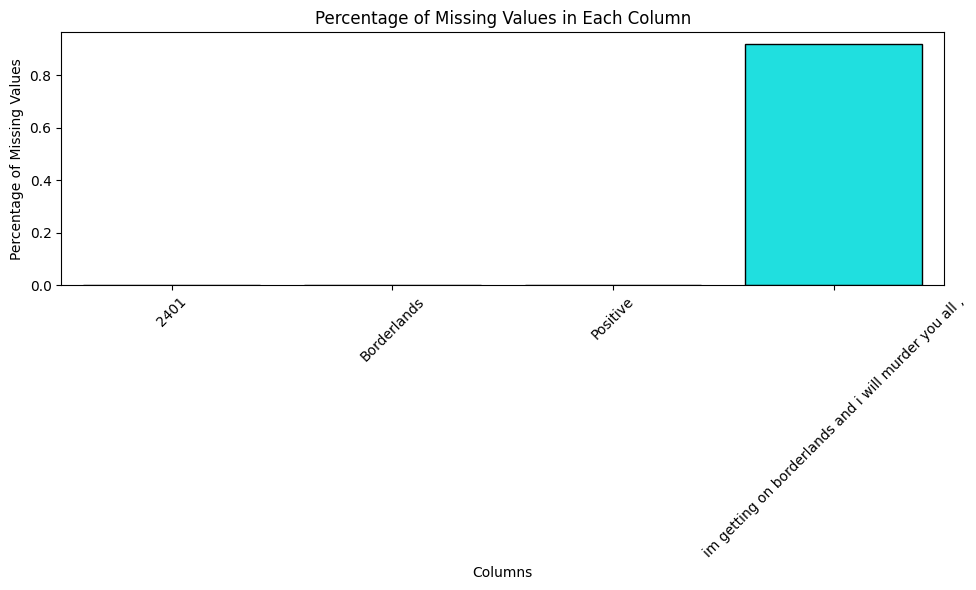

In [38]:
missing_values_count = df.isnull().sum()

        # Print missing values counts
print("Missing Values Counts:")
print(missing_values_count)

         # Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

        # Create a bar chart to visualize the percentage of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='cyan', edgecolor='black')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df.dtypes.value_counts()

object    3
int64     1
Name: count, dtype: int64

In [40]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
train_df = pd.read_csv('twitter_training.csv', names=col_names)
train_df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [41]:
#handling missing values
missing_values_before = train_df.isnull().sum().sum()
print("Number of Missing Values Before:", missing_values_before)
# Drop rows with missing values
train_df.dropna(inplace=True)
# Get the number of missing values after dropping
missing_values_after = train_df.isnull().sum().sum()
print("Number of Missing Values After:", missing_values_after)

Number of Missing Values Before: 686
Number of Missing Values After: 0


In [42]:
# Get the number of duplicate rows before dropping
duplicate_count_before = train_df.duplicated().sum()
print("Number of Duplicate Rows Before:", duplicate_count_before)
# Drop duplicate rows
train_df.drop_duplicates(inplace=True)
# Get the number of duplicate rows after dropping
duplicate_count_after = train_df.duplicated().sum()
print("Number of Duplicate Rows After:", duplicate_count_after)

Number of Duplicate Rows Before: 2340
Number of Duplicate Rows After: 0


In [43]:
train_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')
print("after replacement")
train_df.head()

after replacement


,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<H4>EXPLORATORY DATA ANALYSIS</H4>

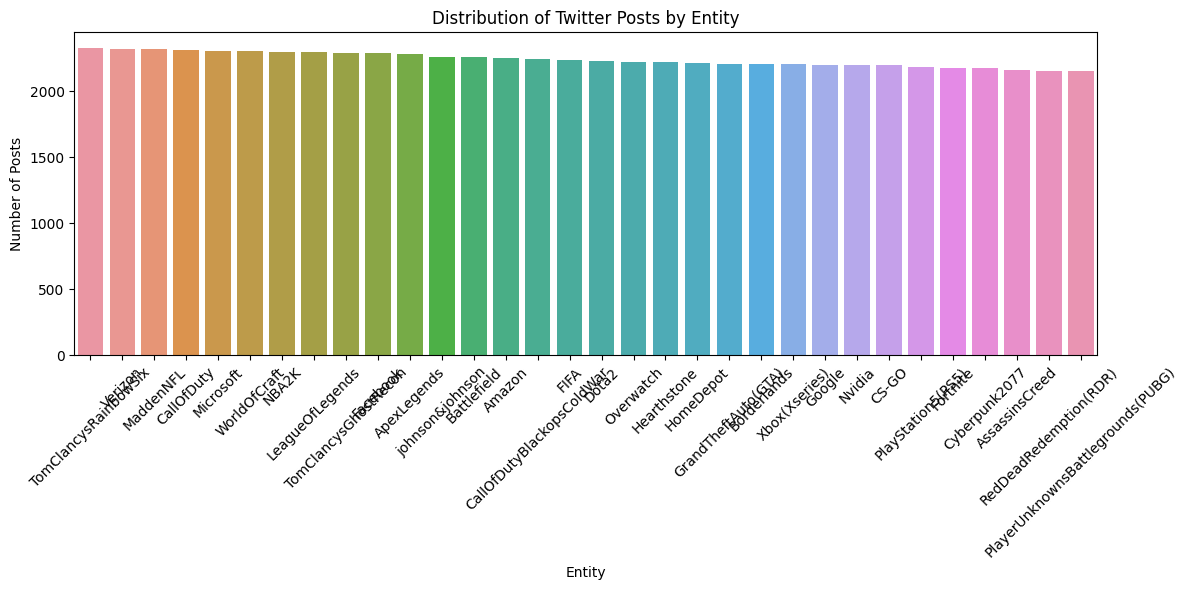

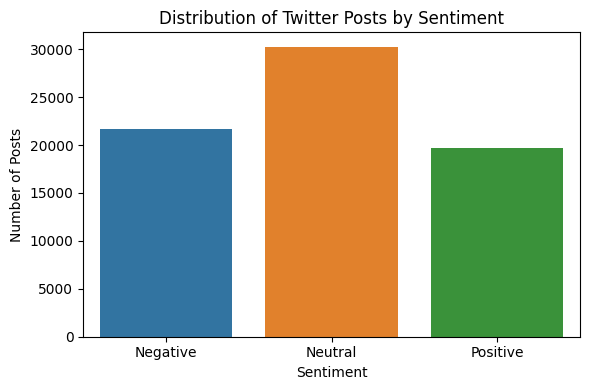

In [44]:
# Univariate analysis of 'Entity' column
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Entity', order=train_df['Entity'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.title('Distribution of Twitter Posts by Entity')
plt.tight_layout()
plt.show()

# Univariate analysis of 'Sentiment' column
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Distribution of Twitter Posts by Sentiment')
plt.tight_layout()
plt.show()

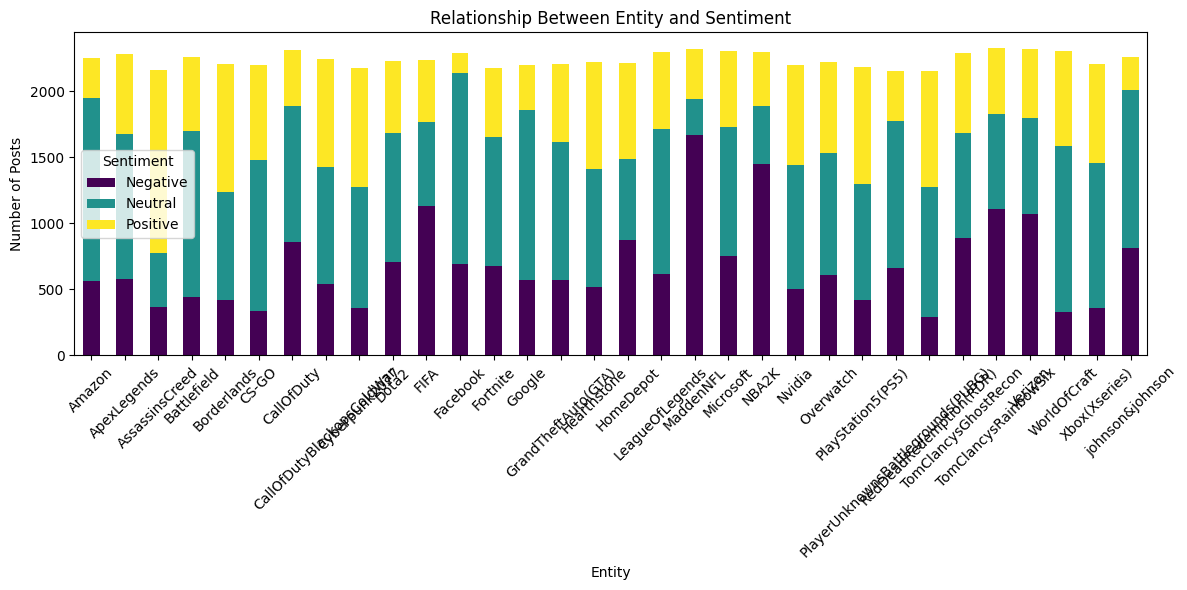

In [45]:
# Create a pivot table to get the counts of sentiment categories for each entity
pivot_table = train_df.pivot_table(index='Entity', columns='Sentiment', values='ID', aggfunc='count', fill_value=0)

# Plot a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.title('Relationship Between Entity and Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [46]:
entity_sentiment_counts = train_df.groupby(['Entity']).size().reset_index(name='Counts')
print(entity_sentiment_counts)

                               Entity  Counts
0                              Amazon    2249
1                         ApexLegends    2278
2                      AssassinsCreed    2156
3                         Battlefield    2255
4                         Borderlands    2206
5                               CS-GO    2195
6                          CallOfDuty    2314
7           CallOfDutyBlackopsColdWar    2242
8                       Cyberpunk2077    2175
9                               Dota2    2225
10                               FIFA    2238
11                           Facebook    2289
12                           Fortnite    2176
13                             Google    2199
14                GrandTheftAuto(GTA)    2208
15                        Hearthstone    2219
16                          HomeDepot    2216
17                    LeagueOfLegends    2296
18                          MaddenNFL    2315
19                          Microsoft    2304
20                              NB

In [47]:
# Create a mapping dictionary for entities and their industries
entity_to_industry = {
    'Amazon': 'E-commerce',
    'ApexLegends': 'Gaming',
    'AssassinsCreed': 'Gaming',
    'Battlefield': 'Gaming',
    'Borderlands': 'Gaming',
    'CS-GO': 'Gaming',
    'CallOfDuty': 'Gaming',
    'CallOfDutyBlackopsColdWar': 'Gaming',
    'Cyberpunk2077': 'Gaming',
    'Dota2': 'Gaming',
    'FIFA': 'Gaming',
    'Facebook': 'Social Media',
    'Fortnite': 'Gaming',
    'Google': 'Technology',
    'GrandTheftAuto(GTA)': 'Gaming',
    'Hearthstone': 'Gaming',
    'HomeDepot': 'Retail',
    'LeagueOfLegends': 'Gaming',
    'MaddenNFL': 'Gaming',
    'Microsoft': 'Technology',
    'NBA2K': 'Gaming',
    'Nvidia': 'Technology',
    'Overwatch': 'Gaming',
    'PlayStation5(PS5)': 'Gaming',
    'PlayerUnknownsBattlegrounds(PUBG)': 'Gaming',
    'RedDeadRedemption(RDR)': 'Gaming',
    'TomClancysGhostRecon': 'Gaming',
    'TomClancysRainbowSix': 'Gaming',
    'Verizon': 'Telecommunications',
    'WorldOfCraft': 'Gaming',
    'Xbox(Xseries)': 'Gaming',
    'johnson&johnson': 'Healthcare'
}
# Apply the mapping to create a new 'Industry' column
train_df['Industry'] = train_df['Entity'].map(entity_to_industry)


# Group by 'Industry' and sum the counts
industry_counts = train_df.groupby(['Industry']).size().reset_index(name='Counts')

print(industry_counts)

             Industry  Counts
0          E-commerce    2249
1              Gaming   53625
2          Healthcare    2257
3              Retail    2216
4        Social Media    2289
5          Technology    6701
6  Telecommunications    2319


In [48]:
train_df.head()

,ID,Entity,Sentiment,Content,Industry
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,Gaming
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Gaming
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Gaming
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Gaming
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Gaming


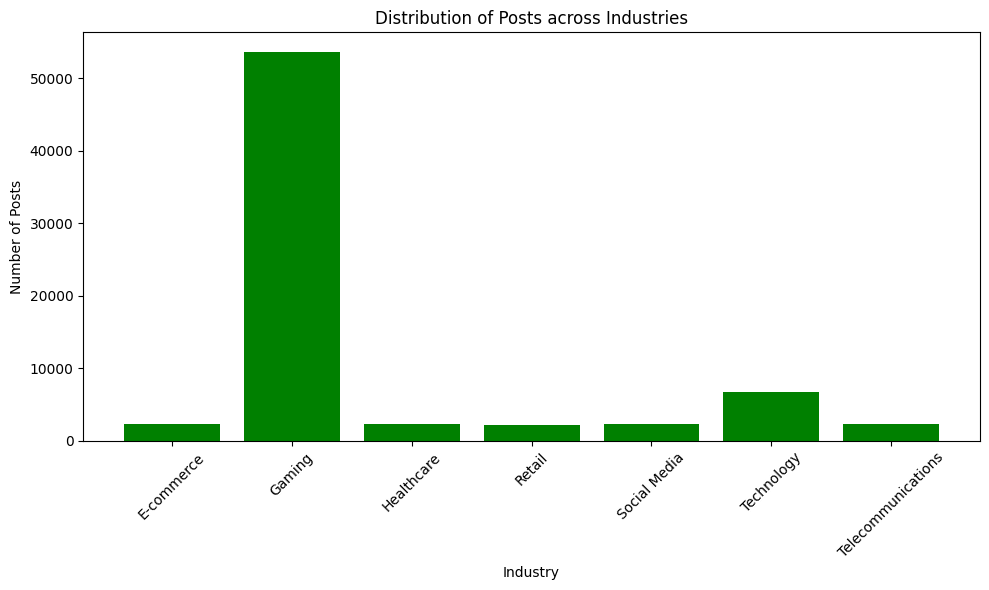

In [49]:
import matplotlib.pyplot as plt

# Data
industries = industry_counts['Industry']
counts = industry_counts['Counts']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(industries, counts, color='green')
plt.xlabel('Industry')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts across Industries')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

ANALYZING THE CONTENT

In [54]:
# Initialize NLTK's WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenize the text into words
        words = text.split()
        
        # Remove stopwords
        words = [word for word in words if word not in stop_words]
        
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words]
        
        # Combine words back into a cleaned sentence
        cleaned_text = ' '.join(words)
        
        return cleaned_text
    else:
        return ""
    
# Apply the cleaning function to the 'Content' column
train_df['Cleaned_Content'] = train_df['Content'].apply(clean_text)

Sentiment Analysis

In [58]:
# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the cleaned content
train_df['Sentiment_Scores'] = train_df['Cleaned_Content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
train_df['Positive_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['pos'])
train_df['Neutral_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['neu'])
train_df['Negative_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['neg'])
train_df['Compound_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['compound'])

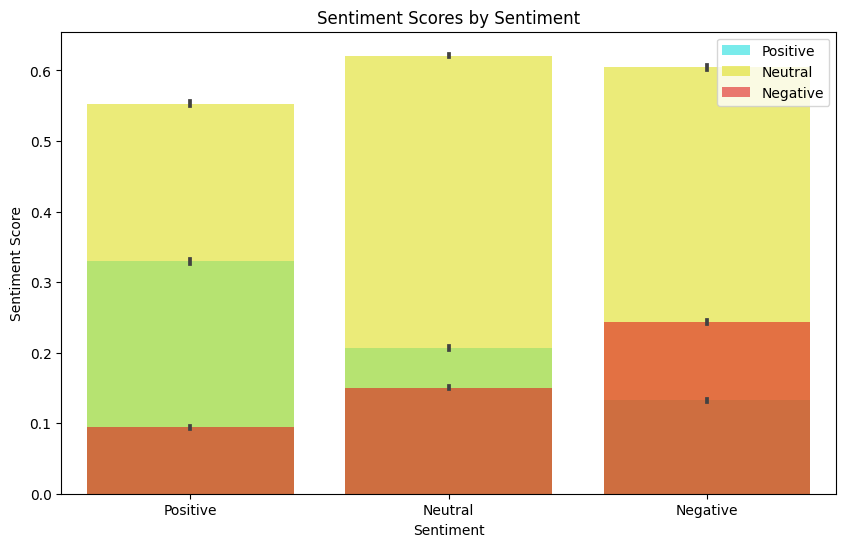

In [59]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot positive sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Positive_Score'], color='cyan', alpha=0.6, label='Positive')

# Plot neutral sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Neutral_Score'], color='yellow', alpha=0.6, label='Neutral')

# Plot negative sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Negative_Score'], color='red', alpha=0.6, label='Negative')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment')
plt.legend()

# Show the plot
plt.show()

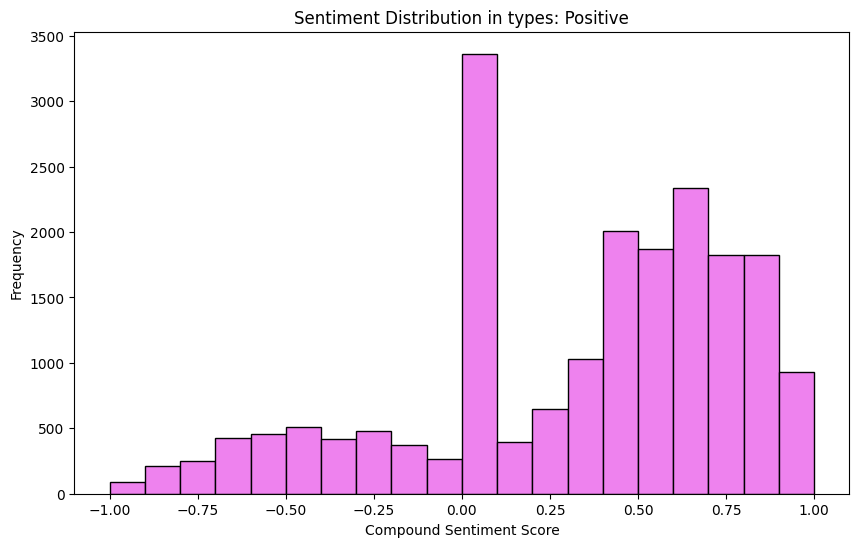

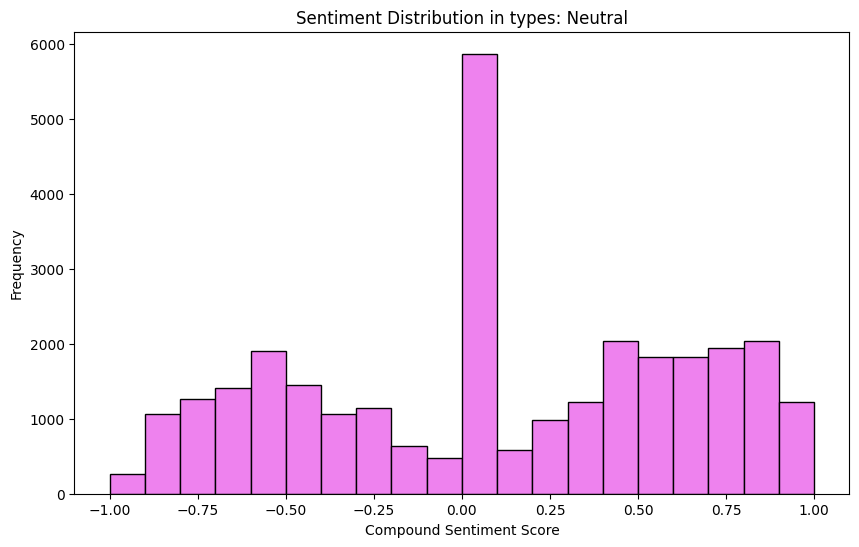

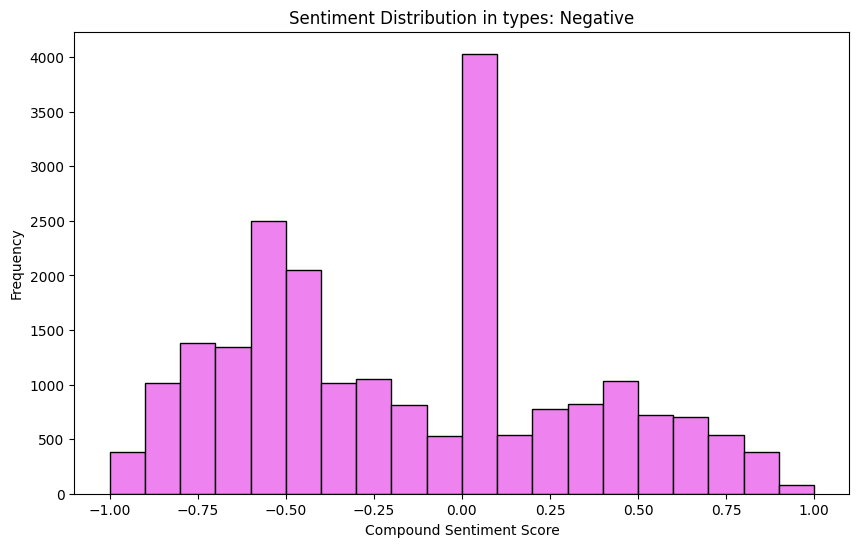

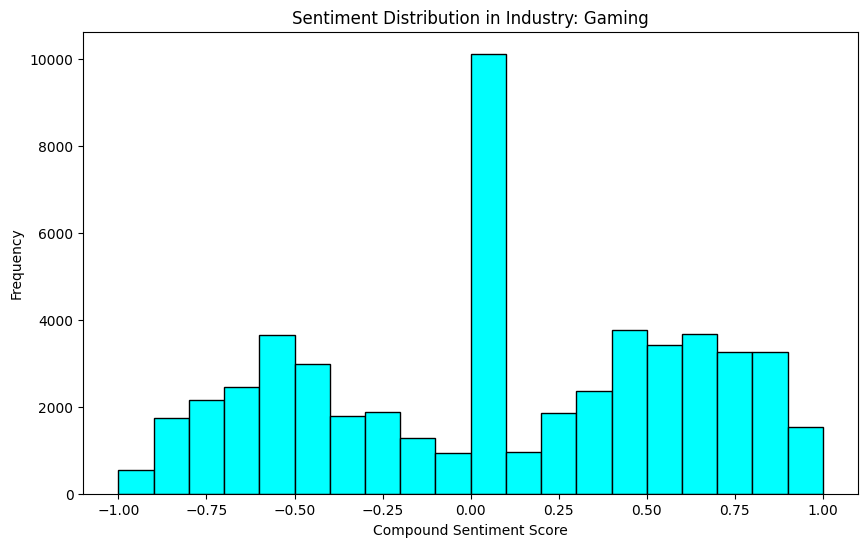

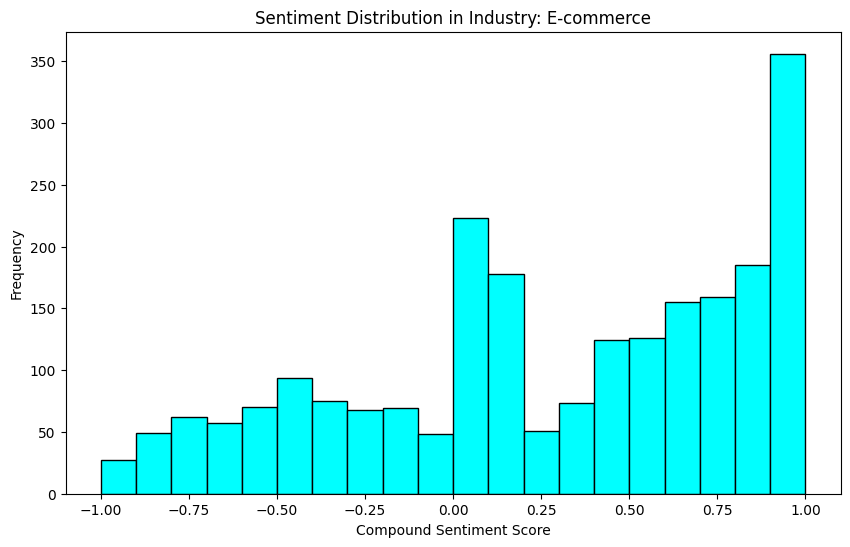

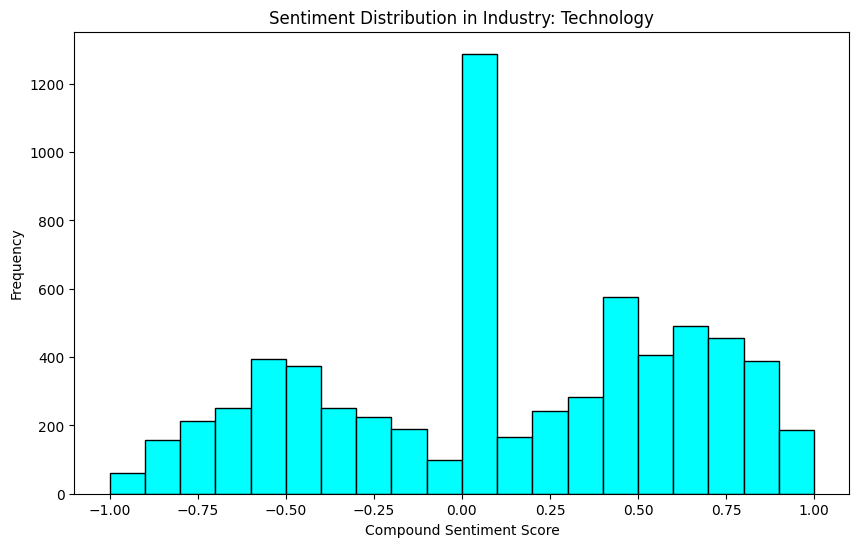

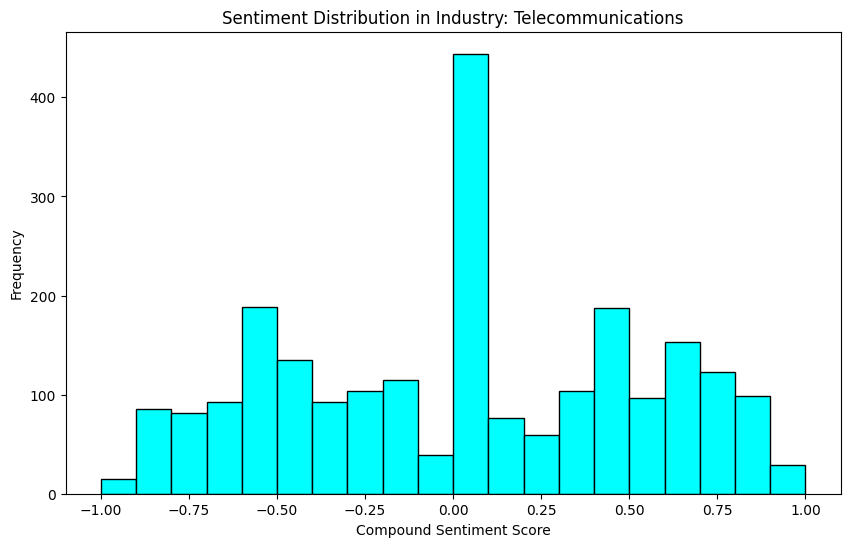

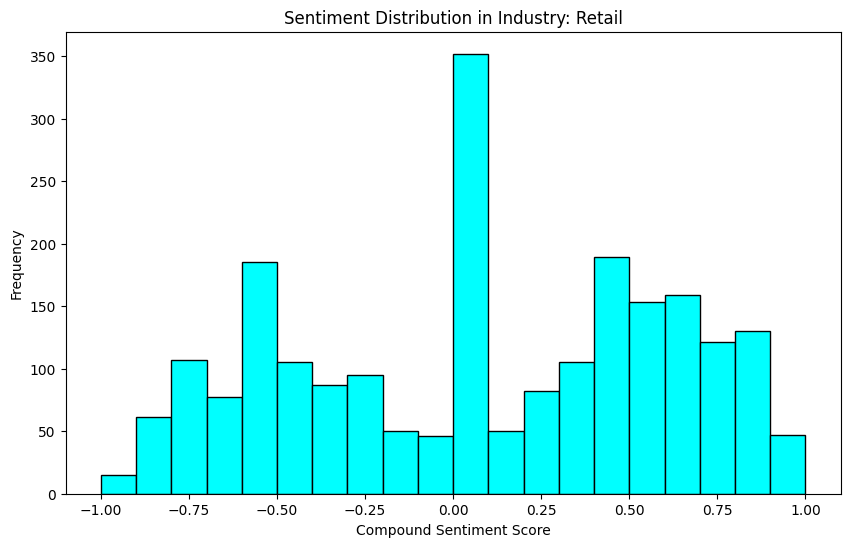

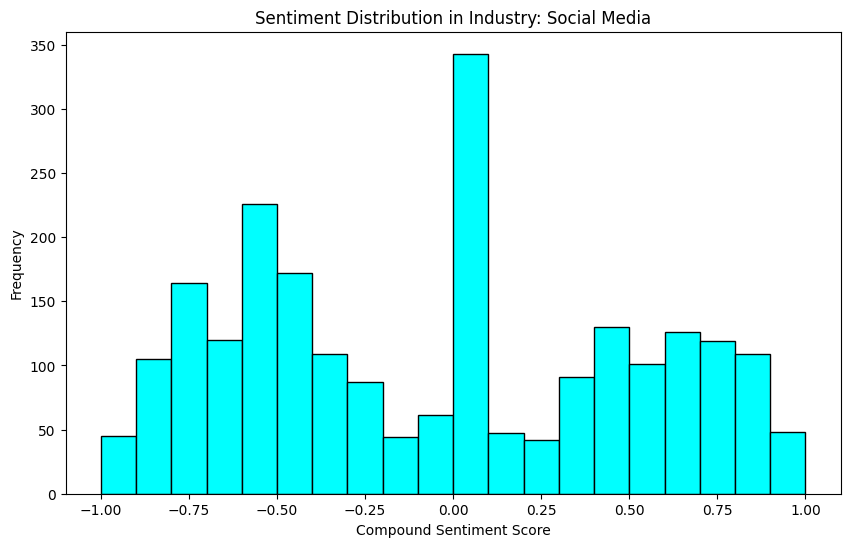

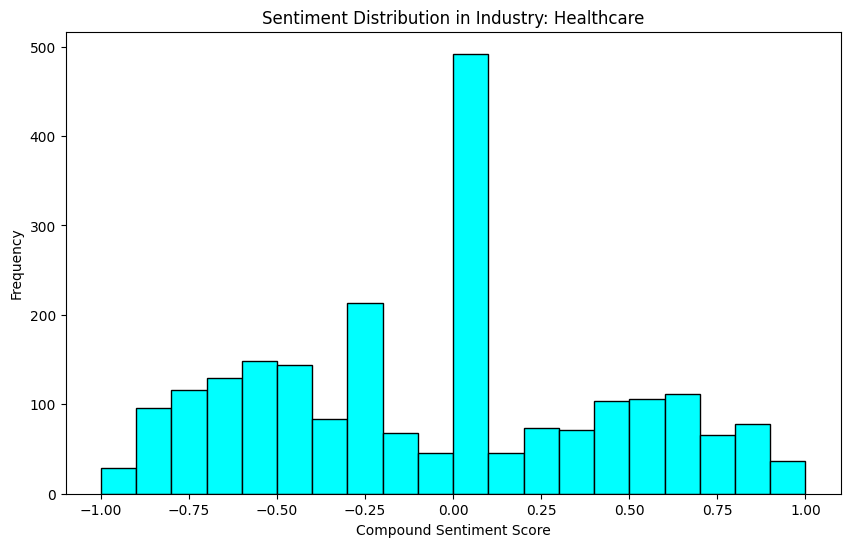

In [60]:
# Plot sentiment distribution for different sections
sections = train_df['Sentiment'].unique()
for section in sections:
    section_data = train_df[train_df['Sentiment'] == section]
    
    plt.figure(figsize=(10, 6))
    plt.hist(section_data['Compound_Score'], bins=np.arange(-1, 1.1, 0.1), color='violet', edgecolor='black')
    plt.title(f'Sentiment Distribution in types: {section}')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot sentiment distribution for different industries
industries = train_df['Industry'].unique()
for industry in industries:
    industry_data = train_df[train_df['Industry'] == industry]
    
    plt.figure(figsize=(10, 6))
    plt.hist(industry_data['Compound_Score'], bins=np.arange(-1, 1.1, 0.1), color='cyan', edgecolor='black')
    plt.title(f'Sentiment Distribution in Industry: {industry}')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

In [61]:
# Function to create word cloud
def create_wordcloud_from_text(text, title, color):
    data = text.split()
    
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=800, 
                   height=400, 
                   max_words=100,
                   colormap=color,
                   max_font_size=200,
                   min_font_size=1,
                   random_state=8888,
                   background_color='white').generate(' '.join(data))
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

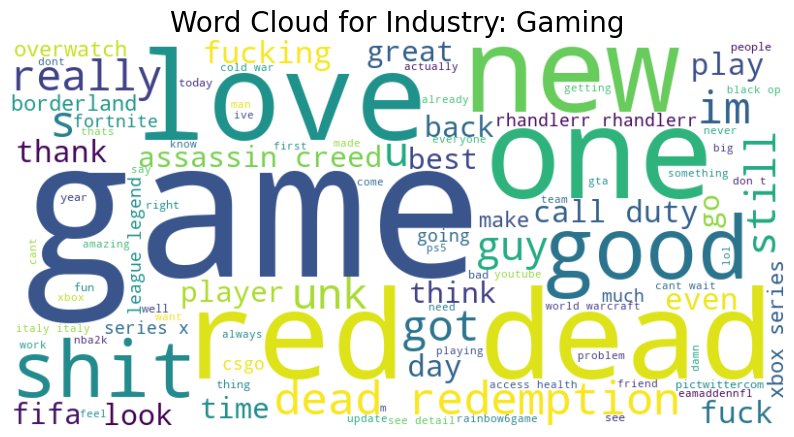

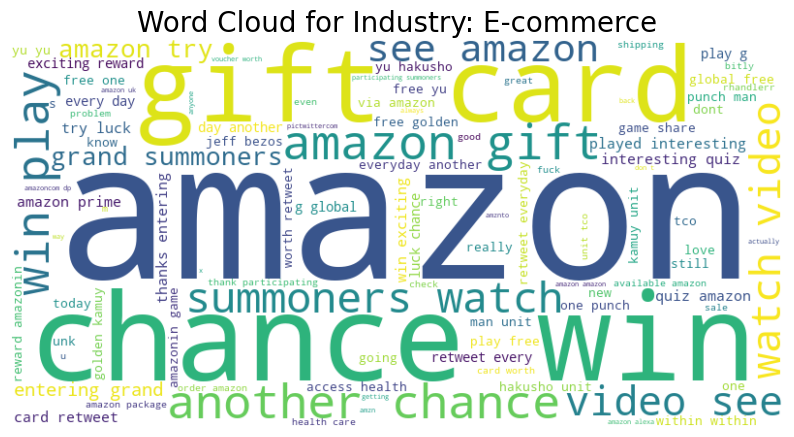

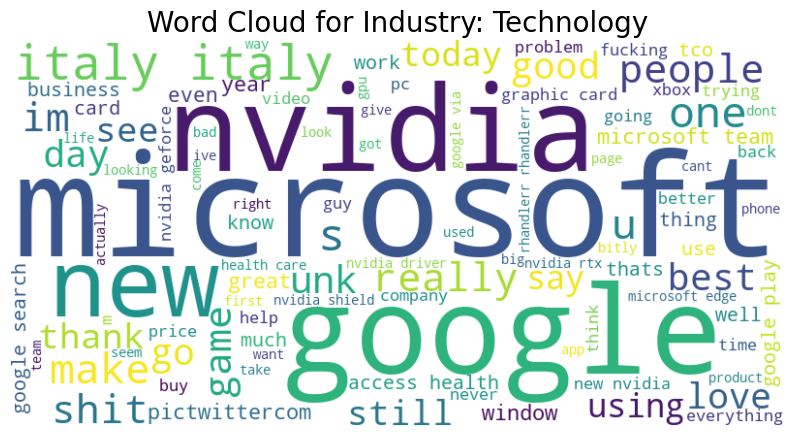

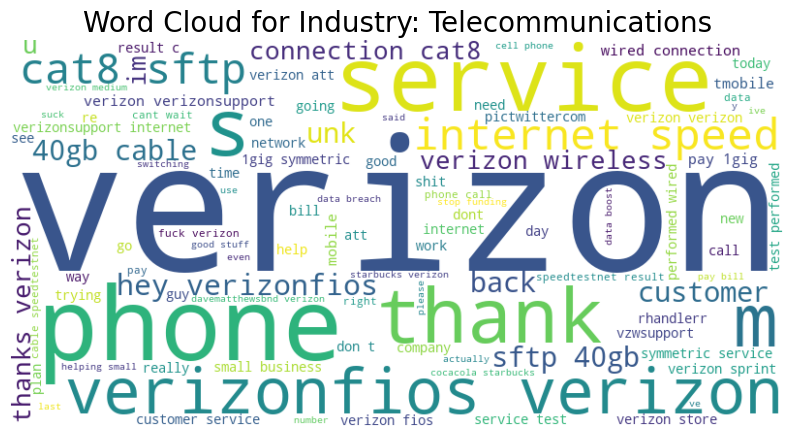

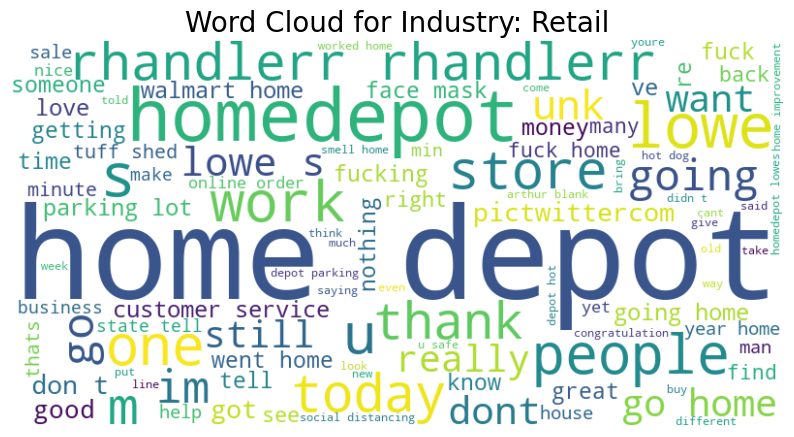

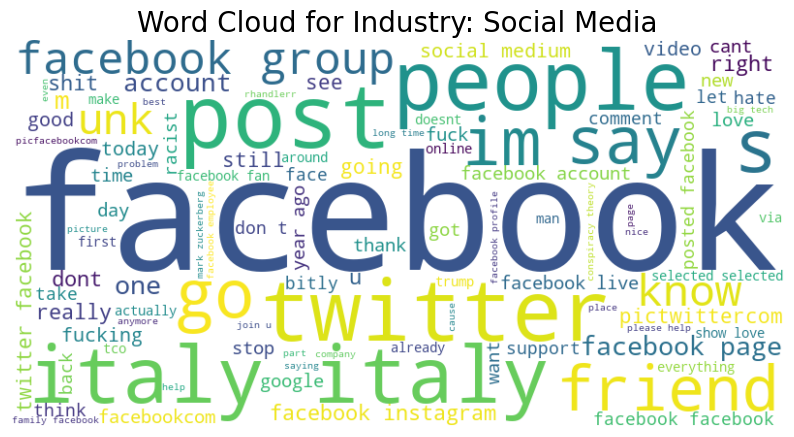

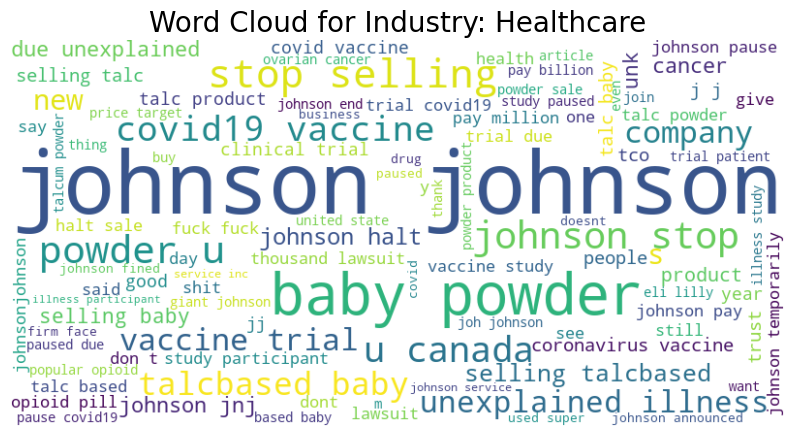

In [62]:
# Create word clouds for different industries
for industry in industries:
    industry_data = train_df[train_df['Industry'] == industry]
    industry_text = ' '.join(industry_data['Cleaned_Content'])
    
    create_wordcloud_from_text(industry_text, f'Word Cloud for Industry: {industry}', 'viridis')

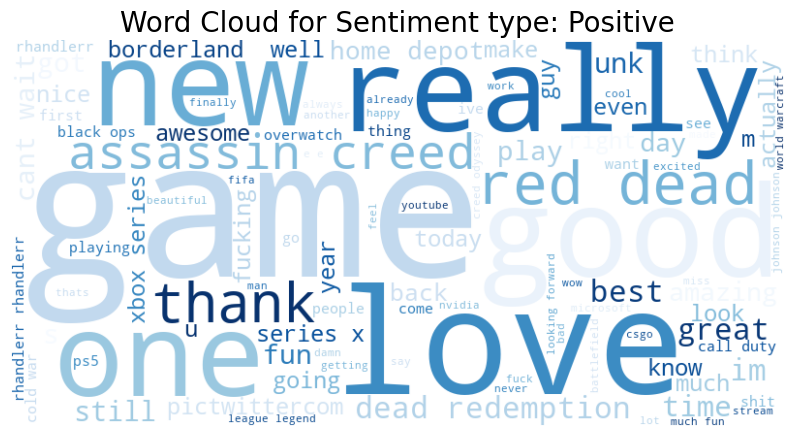

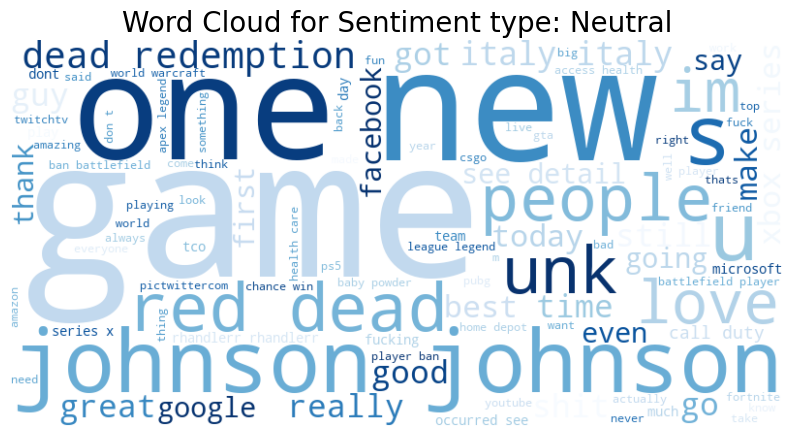

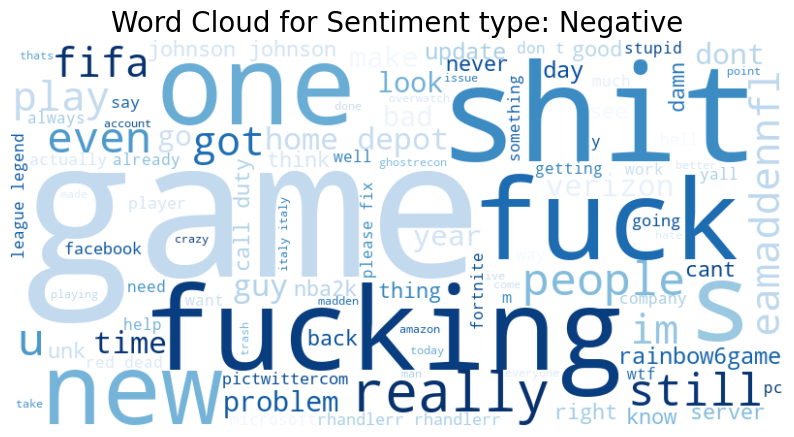

In [63]:
# Create word clouds for different sentiments
for section in sections:
    section_data = train_df[train_df['Sentiment'] == section]
    section_text = ' '.join(section_data['Cleaned_Content'])
    
    create_wordcloud_from_text(section_text, f'Word Cloud for Sentiment type: {section}', 'Blues')

MODELLING AND VALIDATION

In [65]:
# Assuming you have already loaded your dataset and preprocessed it
# Replace train_df with your actual dataframe
X = train_df['Cleaned_Content']
y = train_df['Sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Extraction
text_vectorizer = TfidfVectorizer(max_features=1000)

# 3. Model Building
model = Pipeline([
    ('tfidf_vect', text_vectorizer),
    ('classifier', LogisticRegression(solver='liblinear', multi_class='auto'))
])

# 4. Hyperparameter Tuning using GridSearchCV
params = {
    'tfidf_vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf_vect__max_df': [0.5, 0.75, 1.0],
    'classifier__C': [0.1, 1, 10]
}

grid_cv_pipe = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)

# Print the best hyperparameters
print('Optimized Hyperparameters:', grid_cv_pipe.best_params_)

# 5. Model Evaluation
y_pred = grid_cv_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimized Hyperparameters: {'classifier__C': 1, 'tfidf_vect__max_df': 0.5, 'tfidf_vect__ngram_range': (1, 1)}
              precision    recall  f1-score   support

    Negative       0.67      0.63      0.65      4383
     Neutral       0.62      0.70      0.66      6072
    Positive       0.62      0.53      0.57      3877

    accuracy                           0.63     14332
   macro avg       0.63      0.62      0.63     14332
weighted avg       0.63      0.63      0.63     14332

